In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

c:\Users\33760\anaconda3\envs\myenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Import Data
df_train = pd.read_csv(r'C:\Users\33760\Desktop\concours_kaggle\playground-series-s3e26\train.csv')

In [3]:
# Import Data
df_test = pd.read_csv(r'C:\Users\33760\Desktop\concours_kaggle\playground-series-s3e26\test.csv')

In [4]:
df_train['Status'].value_counts()

C     4965
D     2665
CL     275
Name: Status, dtype: int64

## PRE_PROCESSING

In [5]:
df_train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [6]:
df_train.shape

(7905, 20)

In [7]:
df_test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [8]:
df_test.shape

(5271, 19)

### ***missing values***

In [9]:
missing_rate_train = df_train.isna().sum()/df_train.shape[0]
missing_rate_train

id               0.0
N_Days           0.0
Drug             0.0
Age              0.0
Sex              0.0
Ascites          0.0
Hepatomegaly     0.0
Spiders          0.0
Edema            0.0
Bilirubin        0.0
Cholesterol      0.0
Albumin          0.0
Copper           0.0
Alk_Phos         0.0
SGOT             0.0
Tryglicerides    0.0
Platelets        0.0
Prothrombin      0.0
Stage            0.0
Status           0.0
dtype: float64

In [10]:
missing_rate_test = df_test.isna().sum()/df_test.shape[0]
missing_rate_test

id               0.0
N_Days           0.0
Drug             0.0
Age              0.0
Sex              0.0
Ascites          0.0
Hepatomegaly     0.0
Spiders          0.0
Edema            0.0
Bilirubin        0.0
Cholesterol      0.0
Albumin          0.0
Copper           0.0
Alk_Phos         0.0
SGOT             0.0
Tryglicerides    0.0
Platelets        0.0
Prothrombin      0.0
Stage            0.0
dtype: float64

No missing values !

In [11]:
from functions import drop_column
drop_column(df_train, 'id', df_name = 'df_train')
drop_column(df_test, 'id', df_name = 'df_test')

The 'id' column has been removed from df_train.
The 'id' column has been removed from df_test.


In [12]:
"""# Choisissez les douze premières colonnes (colonnes 0 à 11)
premieres_colonnes = df_train.iloc[:, :12]

# Choisissez la dernière colonne
derniere_colonne = df_train.iloc[:, -1]

# Concaténez les deux sélections pour créer un seul DataFrame
df_train = pd.concat([premieres_colonnes, derniere_colonne], axis=1)"""

'# Choisissez les douze premières colonnes (colonnes 0 à 11)\npremieres_colonnes = df_train.iloc[:, :12]\n\n# Choisissez la dernière colonne\nderniere_colonne = df_train.iloc[:, -1]\n\n# Concaténez les deux sélections pour créer un seul DataFrame\ndf_train = pd.concat([premieres_colonnes, derniere_colonne], axis=1)'

In [13]:
df_train.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [14]:
"""# Choisissez les douze premières colonnes (colonnes 0 à 11)
premieres_colonnes = df_test.iloc[:, :12]

# Choisissez la dernière colonne
derniere_colonne = df_test.iloc[:, -1]

# Concaténez les deux sélections pour créer un seul DataFrame
df_test = pd.concat([premieres_colonnes, derniere_colonne], axis=1)"""

'# Choisissez les douze premières colonnes (colonnes 0 à 11)\npremieres_colonnes = df_test.iloc[:, :12]\n\n# Choisissez la dernière colonne\nderniere_colonne = df_test.iloc[:, -1]\n\n# Concaténez les deux sélections pour créer un seul DataFrame\ndf_test = pd.concat([premieres_colonnes, derniere_colonne], axis=1)'

## ***Train Test - Cleaning - Encoding***

In [15]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "Status"

X = df_train.drop(target_variable, axis = 1)
Y = df_train.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    D
1    C
2    D
3    C
4    C
Name: Status, dtype: object

X :
   N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0     999  D-penicillamine  21532   M       N            N       N     N   
1    2574          Placebo  19237   F       N            N       N     N   
2    3428          Placebo  13727   F       N            Y       Y     Y   
3    2576          Placebo  18460   F       N            N       N     N   
4     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        2.3        316.0     3.35   172.0    1601.0  179.80           63.0   
1        0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2        3.3        299.0     3.55   131.0    1029.0  119.35           50.0   
3        0.6        256.0     3.50    58.0    1653.0   71.30           96.0   
4        1.1        346.0     

In [16]:
X.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0


In [17]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.items():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
Found categorical features  ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


In [18]:
# Separate my train set into two sets of data (trainset, testset)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0, stratify = Y)

In [19]:
# Display label distribution
fig = px.histogram(Y_train, x = 'Status',
                   title = 'Label distribution analysis trainset ',
                   histnorm = 'percent',
                   text_auto = True)
fig.show()

In [20]:
# Display label distribution
fig = px.histogram(Y_test, x = 'Status',
                   title = 'Label distribution analysis df_train',
                   histnorm = 'percent',
                   text_auto = True)
fig.show()

stratify parameter repect the label proportion

## ***Pipeline***

there is generally no need to scale features. Tree-based boosting algorithm and is relatively insensitive to feature scaling. This is because decision trees compare features to thresholds and create divisions based on these thresholds. As a result, feature scaling generally does not have a significant impact on algorithm performance.

In [21]:
# Create pipeline for numeric features
numeric_transformer = SimpleImputer(strategy='mean') #  missing values will be replaced by columns' mean
categorical_transformer = OneHotEncoder(drop='first') # no missing values in categorical data, so we only need the OHE

In [22]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features), # no need numeric_transformer no missing/NaN values
        ('cat', categorical_transformer, categorical_features)
    ])

In [23]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

# Label encoding
print("Encoding labels...")
print(Y_train.head())
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
print("...Done")
print(Y_train[0:5])

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()

# Label encoding
print("Encoding labels...")
print(Y_test[0:5])
Y_test = encoder.transform(Y_test)
print("...Done")
print(Y_test[0:5])

Performing preprocessings on train set...
      N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
1619     799  D-penicillamine  24681   F       N            Y       Y     S   
5147     348          Placebo  22347   F       N            Y       N     N   
3350    4556          Placebo  15463   F       N            N       N     N   
1926    1576  D-penicillamine  24681   F       N            Y       Y     N   
5324     198          Placebo  19295   F       N            Y       Y     N   

      Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
1619        4.0        416.0     3.99   177.0     960.0  158.10   
5147        3.3        226.0     3.80   152.0    9009.8  137.95   
3350        1.8        302.0     3.67    13.0     754.0  130.20   
1926        2.4        416.0     3.18   159.0     718.0  147.25   
5324        5.2        302.0     3.70    34.0    1080.0  137.95   

      Tryglicerides  Platelets  Prothrombin  Stage  
1619          242.0      26

C:\Users\33760\AppData\Local\Temp\ipykernel_9332\2958808329.py:29: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



## NO FREE LUNCH THEOREM

# DECISION TREE MODELISATION

In [24]:
classifier_init = DecisionTreeClassifier(random_state = 0)
classifier_init.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

***Performances***

In [27]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier_init.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier_init.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

print(confusion_matrix(Y_train, Y_train_pred))
print(classification_report(Y_train, Y_train_pred))
print('-----------------------------------------------------------------')
print(confusion_matrix(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

Predictions on training set...
...Done.
[2 2 0 ... 0 2 0]

Predictions on test set...
...Done.
[0 2 0 ... 0 0 0]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3972
           1       1.00      1.00      1.00       220
           2       1.00      1.00      1.00      2132

    accuracy                           1.00      6324
   macro avg       1.00      1.00      1.00      6324
weighted avg       1.00      1.00      1.00      6324

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       993
           1       0.11      0.11      0.11        55
           2       0.64      0.66      0.65       533

    accuracy                           0.72      1581
   macro avg       0.52      0.52      0.52      1581
weighted avg       0.73      0.72      0.72      1581



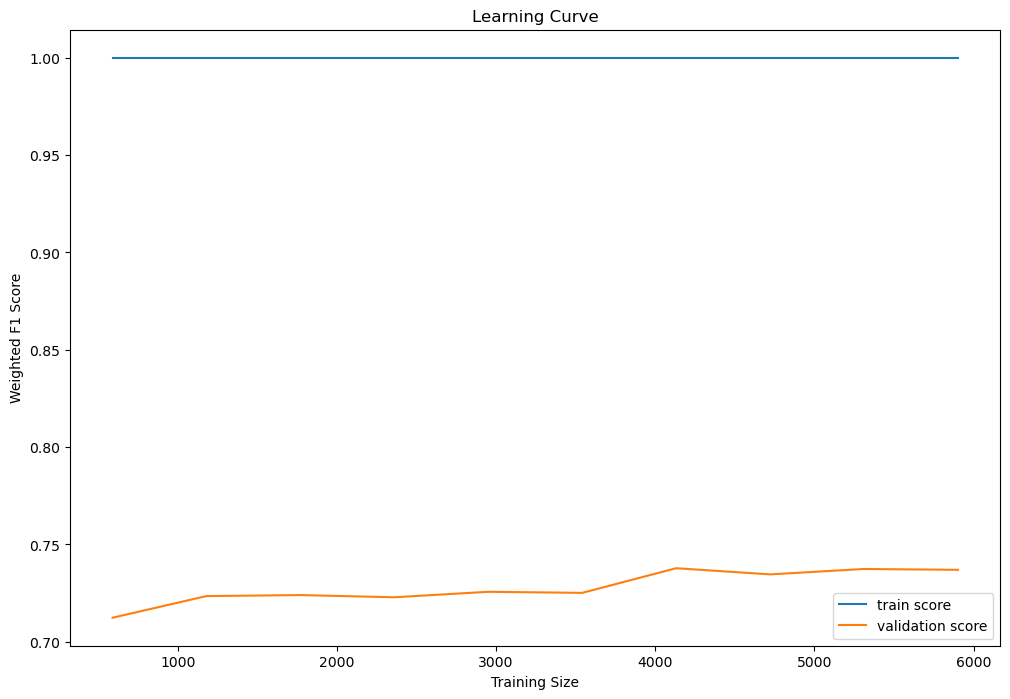

In [28]:
N, train_score, val_score = learning_curve(classifier_init, X_train, Y_train, cv=15, scoring='f1_weighted', train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.xlabel('Training Size')
plt.ylabel('Weighted F1 Score')  # Ajout de 'Weighted' dans le label
plt.title('Learning Curve')
plt.show()

In [29]:
X.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

In [30]:
classifier_init.feature_importances_

array([0.12120845, 0.07077605, 0.3031834 , 0.04911542, 0.05205027,
       0.05381956, 0.05077874, 0.04756715, 0.05659668, 0.04663924,
       0.06110895, 0.05079458, 0.00753831, 0.00628009, 0.        ,
       0.00837887, 0.00689823, 0.00435361, 0.00291241])

AxesSubplot(0.125,0.11;0.775x0.77)


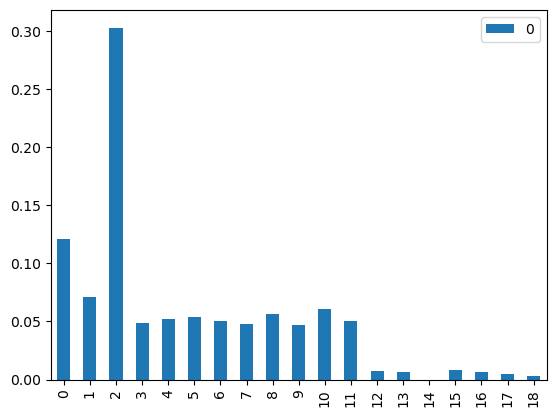

In [31]:
# Supposons que X_train est un DataFrame
X_train_dtf = pd.DataFrame(X_train)

# Entraînez votre classificateur ici (classifier_init)

# Obtenez les importances des fonctionnalités
feature_importances = classifier_init.feature_importances_

# Créez un DataFrame avec les importances des fonctionnalités et les noms des colonnes
importance_df = pd.DataFrame(feature_importances, index=X_train_dtf.columns).plot.bar()

# Affichez le DataFrame des importances des fonctionnalités
print(importance_df)


In [32]:
# Print scores

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred, average = 'weighted')) # weighted usefull for unbalanced multiclass problem give more weight to minority class, what we want to predict as accurately as possible is a patient's death so that we can do something about it
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred, average = 'weighted'))
print()

print("recall on training set : ", recall_score(Y_train, Y_train_pred, average = 'weighted'))
print("recall on test set : ", recall_score(Y_test, Y_test_pred, average = 'weighted'))
print()

print("precision on training set : ", precision_score(Y_train, Y_train_pred, average = 'weighted'))
print("precision on test set : ", precision_score(Y_test, Y_test_pred, average = 'weighted'))
print()

f1-score on training set :  1.0
f1-score on test set :  0.7249023071617408

recall on training set :  1.0
recall on test set :  0.7235926628716003

precision on training set :  1.0
precision on test set :  0.7264388500121666



## ***hyperparameter optimization griedsearch***

In [33]:
# Perform grid search
print("Grid search...")
classifier = DecisionTreeClassifier(random_state = 0)

# Grid of values to be tested
params = {
    'max_depth': [6, 7, 8],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [8, 9, 10, 11]
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 15) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)


Grid search...
...Done.
Best hyperparameters :  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 11}
Best validation accuracy :  0.7979080125932013


## ***Performances***

In [34]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[2 2 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[0.01322751 0.         0.98677249]
 [0.01322751 0.         0.98677249]
 [0.90962099 0.01749271 0.0728863 ]
 ...
 [0.9375     0.         0.0625    ]
 [0.74757282 0.01941748 0.23300971]
 [0.95746032 0.01015873 0.03238095]]



In [35]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[0 2 0 ... 0 0 0]

Probabilities on test set...
...Done.
[[0.71212121 0.09090909 0.1969697 ]
 [0.22424242 0.03636364 0.73939394]
 [0.83218391 0.00229885 0.16551724]
 ...
 [0.95746032 0.01015873 0.03238095]
 [0.89563107 0.03398058 0.07038835]
 [0.89563107 0.03398058 0.07038835]]



Accuracy metric is not enough in a multiclass problem with unbalanced labels

Rappel (Recall ou Sensitivity) :

Définition : Le rappel mesure la proportion d'exemples positifs réels que le modèle a correctement identifiés parmi tous les exemples positifs réels.
Formule : Recall = TP / (TP + FN), où TP est le nombre de vrais positifs et FN est le nombre de faux négatifs.
Précision (Precision) :

Définition : La précision mesure la proportion d'exemples positifs prédits par le modèle qui sont réellement positifs.
Formule : Precision = TP / (TP + FP), où TP est le nombre de vrais positifs et FP est le nombre de faux positifs.
F1-score :

Définition : Le F1-score est la moyenne harmonique de la précision et du rappel. Il donne une mesure équilibrée entre la précision et le rappel.
Formule : F1-score = 2 * (Precision * Recall) / (Precision + Recall)

In [36]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3972
           1       0.76      0.10      0.18       220
           2       0.83      0.74      0.78      2132

    accuracy                           0.84      6324
   macro avg       0.81      0.59      0.62      6324
weighted avg       0.84      0.84      0.83      6324



In [37]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       993
           1       0.38      0.05      0.10        55
           2       0.75      0.68      0.71       533

    accuracy                           0.79      1581
   macro avg       0.65      0.54      0.55      1581
weighted avg       0.78      0.79      0.78      1581



Lorsque le rappel (recall) est égal à zéro, cela signifie que le modèle n'a pas réussi à capturer aucun des exemples positifs réels. En d'autres termes, tous les vrais positifs ont été classés à tort comme négatifs, conduisant à un nombre de faux négatifs équivalent au nombre total d'exemples positifs.

recall
Le modèle a beaucoup de mal à détecter le label CL seul une personne a été bien classé sur le train set et zero sur le test set, parmi les 55 patients qui ont bénéficiés d'une greffe aucun n'a été détecté par le modèle (testset)

le modèle a des résultats très moyen sur la classification des personnes avec le label 2 (D : dead) avec un recall de 0.51, Parmi les 533 patients décédés seul seul 51 % ont bien été classé par le modèle (270)

précision

In [38]:
# Print scores

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred, average = 'weighted')) # weighted usefull for unbalanced multiclass problem give more weight to minority class, what we want to predict as accurately as possible is a patient's death so that we can do something about it
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred, average = 'weighted'))
print()

print("recall on training set : ", recall_score(Y_train, Y_train_pred, average = 'weighted'))
print("recall on test set : ", recall_score(Y_test, Y_test_pred, average = 'weighted'))
print()

print("precision on training set : ", precision_score(Y_train, Y_train_pred, average = 'weighted'))
print("precision on test set : ", precision_score(Y_test, Y_test_pred, average = 'weighted'))
print()

f1-score on training set :  0.828600740213278
f1-score on test set :  0.7808132050366947

recall on training set :  0.8412397216951296
recall on test set :  0.7944339025932954

precision on training set :  0.8377305402042191
precision on test set :  0.7790106160027307



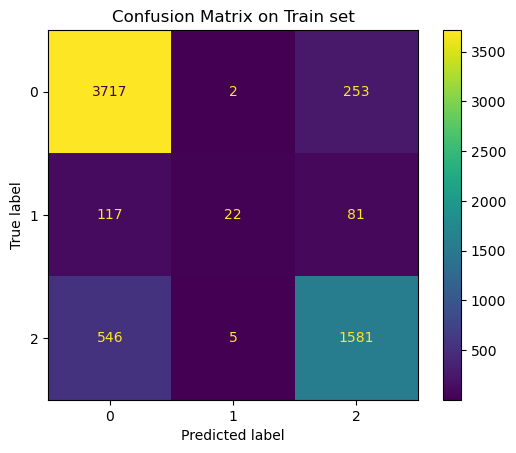

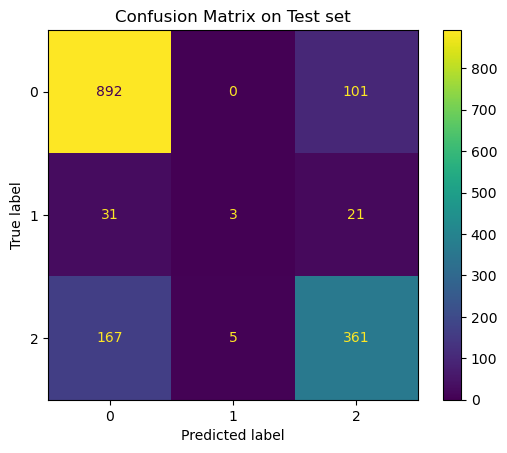

In [39]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

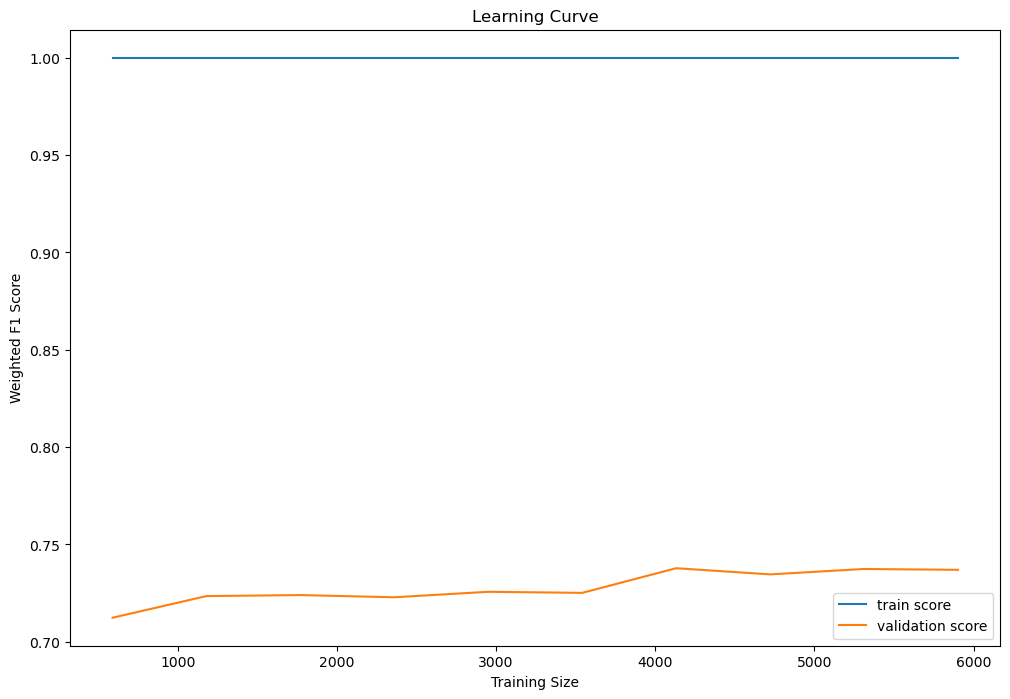

In [40]:
N, train_score, val_score = learning_curve(classifier, X_train, Y_train, cv=15, scoring='f1_weighted', train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.xlabel('Training Size')
plt.ylabel('Weighted F1 Score')  # Ajout de 'Weighted' dans le label
plt.title('Learning Curve')
plt.show()